In [ ]:
# Setup and imports

import sys
import os
from pathlib import Path

# Get the project root (one level up from notebooks directory)
project_root = Path.cwd().parent

# Add project root to Python path
sys.path.append(str(project_root))

# Change working directory to project root
os.chdir(project_root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.utils.logging import setup_logging, get_logger
from src.utils.config import config
from src.data.data_loader import HallDataLoader
from src.data.data_preprocessor import HallDataPreprocessor

setup_logging()
logger = get_logger(__name__)

In [2]:
# Load and explore data
loader = HallDataLoader()
df_hall, df_meals = loader.load_all_data()

print("Hall Dataset Shape:", df_hall.shape)
print("\nHall Dataset Columns:", df_hall.columns.tolist())
print("\nMeals Dataset Shape:", df_meals.shape)
print("\nMeals Dataset Columns:", df_meals.columns.tolist())

2025-06-05 17:39:37,149 - src.data.data_loader - INFO - Loading Hall data from data/raw/hall2018.csv
2025-06-05 17:39:37,205 - src.data.data_loader - INFO - Loaded Hall data: 105426 records, 7 columns
2025-06-05 17:39:37,207 - src.data.data_loader - INFO - Loading meals data from data/raw/hall_meals.csv
2025-06-05 17:39:37,217 - src.data.data_loader - INFO - Loaded meals data: 5955 observations


Hall Dataset Shape: (105426, 7)

Hall Dataset Columns: ['id', 'time', 'gl', 'age', 'Height', 'Weight', 'type']

Meals Dataset Shape: (5955, 7)

Meals Dataset Columns: ['userID', 'Meal', 'time', 'GlucoseValue', 'CHO', 'PRO', 'FAT']


In [3]:
# Data quality analysis
print("Missing values in Hall dataset:")
print(df_hall.isnull().sum())

print("\nUnique subject types:")
print(df_hall['type'].value_counts())

print("\nGlucose value statistics:")
print(df_meals['GlucoseValue'].describe())

Missing values in Hall dataset:
id            0
time         24
gl            9
age           0
Height    18292
Weight    18292
type          0
dtype: int64

Unique subject types:
type
non-diabetic    70536
pre-diabetic    25677
diabetic         9213
Name: count, dtype: int64

Glucose value statistics:
count    5955.000000
mean      102.735544
std        30.732820
min        42.000000
25%        82.000000
50%        95.000000
75%       116.000000
max       270.000000
Name: GlucoseValue, dtype: float64


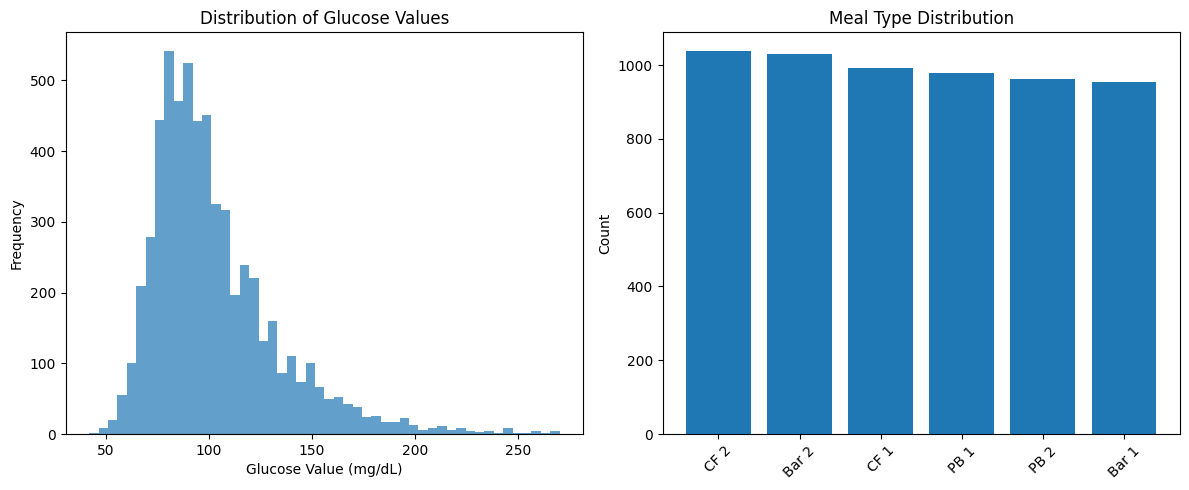

In [4]:
# Visualize glucose distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Glucose distribution
axes[0].hist(df_meals['GlucoseValue'], bins=50, alpha=0.7)
axes[0].set_xlabel('Glucose Value (mg/dL)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Glucose Values')

# Glucose by meal type
meal_types = df_meals['Meal'].value_counts().head(10)
axes[1].bar(range(len(meal_types)), meal_types.values)
axes[1].set_xticks(range(len(meal_types)))
axes[1].set_xticklabels(meal_types.index, rotation=45)
axes[1].set_ylabel('Count')
axes[1].set_title('Meal Type Distribution')

plt.tight_layout()
plt.show()